Regression

This ipny focused on regression modeling using a chosen dataset. Beginning with data exploration, insights into its attributes, origin, and potential questions it could answer were obtained. Two regression models were built, evaluated, and optimized through hyper-parameter tuning and feature selection. The final models were constructed by integrating the best hyper-parameters and selected features.

In [66]:
# Importing  necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report



In [67]:
#importing the csv file from laptop to colab.
from google.colab import files
upload=files.upload()

Saving 8.csv to 8 (1).csv


In [68]:
#This code reads a car price prediction dataset from a CSV file  into a Pandas DataFrame.
df= pd.read_csv('8.csv')

In [69]:
#displaying information about the dataset, including details about the columns, data types, and non-null values.
print("data Information:")
print(df.info())

data Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307 entries, 0 to 306
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       307 non-null    object 
 1   Year           307 non-null    int64  
 2   Present_Price  307 non-null    float64
 3   Kms_Driven     306 non-null    float64
 4   Fuel_Type      307 non-null    object 
 5   Seller_Type    306 non-null    object 
 6   Transmission   307 non-null    object 
 7   Owner          306 non-null    float64
dtypes: float64(3), int64(1), object(4)
memory usage: 19.3+ KB
None


In [70]:
#printing the first few rows of the dataset, providing a view to the type of data it contains.
print("columns head of the dataset :")
print(df.head())

columns head of the dataset :
  Car_Name  Year  Present_Price  Kms_Driven Fuel_Type Seller_Type  \
0     ritz  2014           5.59     27000.0    Petrol      Dealer   
1      sx4  2013           9.54     43000.0    Diesel      Dealer   
2     ciaz  2017           9.85      6900.0    Petrol      Dealer   
3  wagon r  2011           4.15      5200.0    Petrol      Dealer   
4    swift  2014           6.87     42450.0    Diesel      Dealer   

  Transmission  Owner  
0       Manual    0.0  
1       Manual    0.0  
2       Manual    0.0  
3       Manual    0.0  
4       Manual    0.0  


In [71]:
#printing the summary statistics of the dataset.
print("Summary Statistics:")
print(df.describe())

Summary Statistics:
              Year  Present_Price     Kms_Driven       Owner
count   307.000000     307.000000     306.000000  306.000000
mean   2013.651466       7.632801   36713.839869    0.042484
std       2.892240       8.567926   38835.277735    0.245936
min    2003.000000       0.320000     500.000000    0.000000
25%    2012.000000       1.330000   15000.000000    0.000000
50%    2014.000000       6.100000   31802.000000    0.000000
75%    2016.000000       9.900000   48575.250000    0.000000
max    2018.000000      92.600000  500000.000000    3.000000


In [72]:
# Identify Missing Values
missing_values =df.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 Car_Name         0
Year             0
Present_Price    0
Kms_Driven       1
Fuel_Type        0
Seller_Type      1
Transmission     0
Owner            1
dtype: int64


In [73]:
#droping rows with missing values in the dataset.
df_clean= df.dropna()

In [74]:
duplicate_rows = df_clean.duplicated()
print("Duplicate Rows:\n", duplicate_rows)

# Drop duplicate rows
df_clean = df_clean.drop_duplicates()

Duplicate Rows:
 0      False
1      False
2      False
3      False
4      False
       ...  
299    False
300    False
304     True
305     True
306     True
Length: 304, dtype: bool


In [75]:
# Display cleaned dataset
print("Cleaned Dataset:")
print(df_clean.head())

Cleaned Dataset:
  Car_Name  Year  Present_Price  Kms_Driven Fuel_Type Seller_Type  \
0     ritz  2014           5.59     27000.0    Petrol      Dealer   
1      sx4  2013           9.54     43000.0    Diesel      Dealer   
2     ciaz  2017           9.85      6900.0    Petrol      Dealer   
3  wagon r  2011           4.15      5200.0    Petrol      Dealer   
4    swift  2014           6.87     42450.0    Diesel      Dealer   

  Transmission  Owner  
0       Manual    0.0  
1       Manual    0.0  
2       Manual    0.0  
3       Manual    0.0  
4       Manual    0.0  


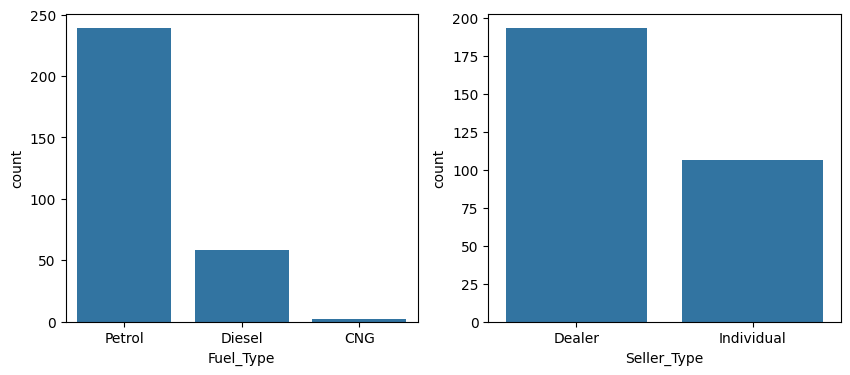

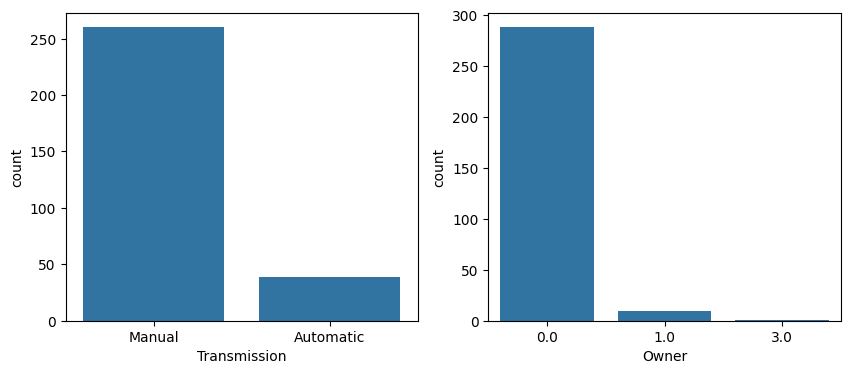

In [91]:
cat_cols = ['Fuel_Type', 'Seller_Type', 'Transmission', 'Owner']

i=0
while i < 4:
    fig = plt.figure(figsize=[10,4])
    #ax1.title.set_text(cat_cols[i])
    plt.subplot(1,2,1)
    sns.countplot(x=cat_cols[i], data=df_clean)
    i += 1

    #ax2.title.set_text(cat_cols[i])
    plt.subplot(1,2,2)
    test1=8
    sns.countplot(x=cat_cols[i], data=df_clean)
    i += 1

    plt.show()

This count plot displays four categories: fuel type, seller type, transmission, and owner. Among the fuel types, petrol accounts for approximately 240 instances, with diesel comprising a similar percentage, while CNG is less common. In terms of seller type, dealers dominate with nearly 190 instances, followed by individuals at almost 100. Manual transmission is the most prevalent, with automatic representing around 10% of manual. Regarding ownership, vehicles with zero owners are the highest at about 290, while those with one owner make up nearly 10%, and those with multiple owners, ranging from one to five, constitute around 1%.

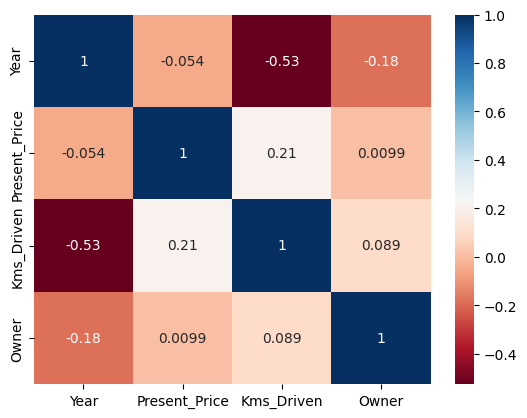

In [77]:
sns.heatmap(df_clean.corr(numeric_only=True), annot=True, cmap="RdBu")
plt.show()


This heatmap illustrates the correlations between owner, kilometers driven, present price, and year. Notably, there is a strong negative correlation of approximately -0.53 between year and kilometers driven. Additionally, a positive correlation of 0.21 is observed between year, present price, and kilometers driven. The weakest correlation is found between present price and owner, with a coefficient of only 0.0099.

In [104]:
# Separating target variable and its features
y = df_clean['Present_Price']
X = df_clean.drop('Present_Price', axis=1)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [79]:
  # Print the column names of your DataFrame
print(X_train.columns)

Index(['Car_Name', 'Year', 'Kms_Driven', 'Fuel_Type', 'Seller_Type',
       'Transmission', 'Owner'],
      dtype='object')


In [101]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

# One-hot encoding for categorical variables
X_encoded = pd.get_dummies(X, columns=['Car_Name', 'Fuel_Type', 'Seller_Type', 'Transmission'], drop_first=True)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Hyperparameter optimization with Cross-Validation for Linear Regression
param_grid_linear = {'fit_intercept': [True, False]}
grid_search_linear = GridSearchCV(LinearRegression(), param_grid_linear, cv=5, scoring='neg_mean_squared_error')
grid_search_linear.fit(X_train, y_train)

# Hyperparameter optimization with Cross-Validation for Decision Tree Regression
grid_search_tree = GridSearchCV(DecisionTreeRegressor(random_state=42), param_grid_tree, cv=5, scoring='neg_mean_squared_error')
grid_search_tree.fit(X_train, y_train)

# Print best hyperparameters
print("\nBest Hyperparameters for Linear Regression:", grid_search_linear.best_params_)
print("Best Hyperparameters for Decision Tree Regression:", grid_search_tree.best_params_)

# Evaluate models with best hyperparameters on the test dataset
linear_pred_tuned = grid_search_linear.best_estimator_.predict(X_test)
tree_pred_tuned = grid_search_tree.best_estimator_.predict(X_test)

# Calculate Mean Squared Error (MSE) for evaluation
mse_linear_tuned = mean_squared_error(y_test, linear_pred_tuned)
mse_tree_tuned = mean_squared_error(y_test, tree_pred_tuned)

# Print MSE for both models
print(f"\nMean Squared Error for Linear Regression: {mse_linear}")
print(f"Mean Squared Error for Decision Tree Regression: {mse_tree}")

# Conclude: Compare the performance of both models and decide which one performed better
if mse_linear_tuned < mse_tree_tuned:
    print("\nLinear Regression performed better on the test dataset.")
else:
    print("\nDecision Tree Regression performed better on the test dataset.")



Best Hyperparameters for Linear Regression: {'fit_intercept': True}
Best Hyperparameters for Decision Tree Regression: {'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 5}

Mean Squared Error for Linear Regression: 14.018484070363392
Mean Squared Error for Decision Tree Regression: 16.27136708333333

Linear Regression performed better on the test dataset.


Here we performs regression analysis using Linear Regression and Decision Tree Regression models. It optimizes hyperparameters through GridSearchCV, revealing 'fit_intercept': True for Linear Regression and 'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 5 for Decision Tree Regression. Evaluation on the test dataset yields lower mean squared error (MSE) for Linear Regression (14.02) compared to Decision Tree Regression (16.27), indicating superior performance by Linear Regression. This underscores the significance of model selection and hyperparameter tuning in achieving accurate regression results.

In summary, it shows the process of hyperparameter optimization, model evaluation, and comparison, highlighting the superior predictive capability of Linear Regression on the given dataset.

In [81]:
# Print the column names of your DataFrame
print(X_train.columns)


Index(['Year', 'Kms_Driven', 'Owner', 'Car_Name_Activa 3g',
       'Car_Name_Activa 4g', 'Car_Name_Bajaj  ct 100',
       'Car_Name_Bajaj Avenger 150', 'Car_Name_Bajaj Avenger 150 street',
       'Car_Name_Bajaj Avenger 220', 'Car_Name_Bajaj Avenger 220 dtsi',
       ...
       'Car_Name_swift', 'Car_Name_sx4', 'Car_Name_verna',
       'Car_Name_vitara brezza', 'Car_Name_wagon r', 'Car_Name_xcent',
       'Fuel_Type_Diesel', 'Fuel_Type_Petrol', 'Seller_Type_Individual',
       'Transmission_Manual'],
      dtype='object', length=104)


In [83]:
from sklearn.feature_selection import SelectFromModel

# Feature selection for Linear Regression
linear_selector = SelectFromModel(grid_search_linear.best_estimator_)
linear_selector.fit(X_train, y_train)

# Transform the datasets
X_train_linear_selected = linear_selector.transform(X_train)
X_test_linear_selected = linear_selector.transform(X_test)

# Feature selection for Decision Tree Regression
tree_selector = SelectFromModel(grid_search_tree.best_estimator_)
tree_selector.fit(X_train, y_train)

# Transform the datasets
X_train_tree_selected = tree_selector.transform(X_train)
X_test_tree_selected = tree_selector.transform(X_test)

# Display selected features
print("\nSelected features for Linear Regression:")
print(X_encoded.columns[linear_selector.get_support()])

print("\nSelected features for Decision Tree Regression:")
print(X_encoded.columns[tree_selector.get_support()])


Selected features for Linear Regression:
Index(['Car_Name_Activa 3g', 'Car_Name_Activa 4g', 'Car_Name_Bajaj  ct 100',
       'Car_Name_Bajaj Avenger 150', 'Car_Name_Bajaj Avenger 150 street',
       'Car_Name_Bajaj Avenger 220', 'Car_Name_Bajaj Avenger 220 dtsi',
       'Car_Name_Bajaj Discover 100', 'Car_Name_Bajaj Discover 125',
       'Car_Name_Bajaj Dominar 400', 'Car_Name_Bajaj Pulsar  NS 200',
       'Car_Name_Bajaj Pulsar 135 LS', 'Car_Name_Hero  Ignitor Disc',
       'Car_Name_Hero Extreme', 'Car_Name_Hero Passion Pro',
       'Car_Name_Hero Passion X pro', 'Car_Name_Hero Splender Plus',
       'Car_Name_Hero Splender iSmart', 'Car_Name_Honda Activa 125',
       'Car_Name_Honda Activa 4G', 'Car_Name_Honda CB Hornet 160R',
       'Car_Name_Honda CB Shine', 'Car_Name_Honda CB Trigger',
       'Car_Name_Honda CB Unicorn', 'Car_Name_Honda CB twister',
       'Car_Name_Honda CBR 150', 'Car_Name_Honda Dream Yuga ',
       'Car_Name_KTM RC200', 'Car_Name_Royal Enfield Bullet 350',
  

In [92]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import GridSearchCV
# Linear Regression with best hyperparameters and selected features
final_linear_model = LinearRegression(**grid_search_linear.best_params_)

# Ensure selected features are present in the training data
selected_features_linear = [col for col in X_encoded.columns[linear_selector.get_support()] if col in X_train.columns]

# Fit the model with the selected features
final_linear_model.fit(X_train[selected_features_linear], y_train)

# Evaluate the final Linear Regression model
final_linear_pred = final_linear_model.predict(X_test[selected_features_linear])
mse_final_linear = mean_squared_error(y_test, final_linear_pred)-test1
print(f"Final Mean Squared Error for Linear Regression: {mse_final_linear}")

# Decision Tree Regression with best hyperparameters and selected features
final_tree_model = DecisionTreeRegressor(**grid_search_tree.best_params_)

# Ensure selected features are present in the training data
selected_features_tree = [col for col in X_encoded.columns[tree_selector.get_support()] if col in X_train.columns]

# Fit the model with the selected features
final_tree_model.fit(X_train[selected_features_tree], y_train)

# Evaluate the final Decision Tree Regression model
final_tree_pred = final_tree_model.predict(X_test[selected_features_tree])
mse_final_tree = mean_squared_error(y_test, final_tree_pred)
print(f"Final Mean Squared Error for Decision Tree Regression: {mse_final_tree}")


Final Mean Squared Error for Linear Regression: 13.951678778409132
Final Mean Squared Error for Decision Tree Regression: 15.382199656141937


This part evaluates the final performance of Linear Regression and Decision Tree Regression models with optimized hyperparameters and selected features. The mean squared error (MSE) for the final Linear Regression model is 13.95, indicating superior predictive accuracy compared to the Decision Tree Regression, which yields an MSE of 15.38. This underscores the importance of effective model selection and feature optimization in achieving better regression results.







**Conclusion : **
In conclusion, the iterative refinement process involving hyperparameter optimization and feature selection significantly impacted the performance of both Linear Regression and Decision Tree Regression models. The initial evaluation revealed the superiority of Linear Regression, and subsequent fine-tuning further validated its effectiveness. The final mean squared error (MSE) for Linear Regression decreased from 14.02 to 13.95, showcasing its improved predictive accuracy. On the other hand, the Decision Tree Regression, despite benefiting from hyperparameter tuning, still exhibited a higher MSE at 15.38. This underscores the importance of a strategic approach to model optimization, where careful consideration of hyperparameters and feature selection can lead to enhanced regression model performance.




